# Importing Libraries

In [58]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Spark DataTable Read:
```python
def load_data(path_string):
  
  data = spark.read.option("header", "true") \
    .option("delimiter", ",") \
    .option("inferSchema", "true") \
    .csv(path_string)
  df = data.select("*").toPandas()
  return df
```

# Storing all the tables in a directory to a df

```python
all_files = pd.DataFrame(dbutils.fs.ls('/mnt/EGA_AT/iRPMS/20200415/'))

#Listing just those files whose name contains the word "Schedule"
all_files = all_files[all_files['name'].str.contains("SCHEDULE")]

files_location = list(all_files.path)

all_files
# files_location
```

|                                     path|                name |  size|
|-----------------------------------------|---------------------|------|
| dbfs:/mnt/EGA_AT/iRPMS/20200415/....... | file_name.extension |  375 |


# Loading Data to DF
```python
table_name = load_data("/location/to/dir/or/table/file_name.extension")
```

In [88]:
list1 = [1,2,3,4,5,1,2,3,4,5,6,7,8,9,10,11,12,13]
list2 = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','q','r','s']
list3 = [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3]
list4 = ['a','b','c','d','e','a','b','c','d','e','f','g','h','i','j','k','l','m']

df = pd.DataFrame(list(zip(list1,list2,list3,list4)), columns=['first','second','third','fourth'])
df

,first,second,third,fourth
0,1,a,20,a
1,2,b,19,b
2,3,c,18,c
3,4,d,17,d
4,5,e,16,e
5,1,f,15,a
6,2,g,14,b
7,3,h,13,c
8,4,i,12,d
9,5,j,11,e


# 5 Point Summary

In [89]:
df.describe()

,first,third
count,18.000000,18.000000
mean,5.888889,11.500000
std,3.833120,5.338539
min,1.000000,3.000000
25%,3.000000,7.250000
50%,5.000000,11.500000
75%,8.750000,15.750000
max,13.000000,20.000000


# Concatenating values of 2 or more cols

In [90]:
df['fifth'] = df['first'].map(str)+"_"+df['second'].map(str)
df.head()

,first,second,third,fourth,fifth
0,1,a,20,a,1_a
1,2,b,19,b,2_b
2,3,c,18,c,3_c
3,4,d,17,d,4_d
4,5,e,16,e,5_e


# Subset of a DF

In [92]:
df2 = df[['first','fifth']][:4]
df2

,first,fifth
0,1,1_a
1,2,2_b
2,3,3_c
3,4,4_d


# Sorting the values in col/s

In [93]:
df.sort_values(by=['first','third'])

,first,second,third,fourth,fifth
5,1,f,15,a,1_f
0,1,a,20,a,1_a
6,2,g,14,b,2_g
1,2,b,19,b,2_b
7,3,h,13,c,3_h
2,3,c,18,c,3_c
8,4,i,12,d,4_i
3,4,d,17,d,4_d
9,5,j,11,e,5_j
4,5,e,16,e,5_e


# Count of NAs in a each column of a dataframe
```python
print(f"Count of NaNs in each column:\n{df.isnull().sum().sort_values(ascending=False)}")
```

# Basic DataFrame understanding
```python
print(f'Ta ble Shape: {df.shape}\n')
print(f'Oldest and Latest Date: {df.ANP_DATE.min(), df.ANP_DATE.max()}\n')
print(f'List of Events:\n{df.ANP_PROBLEM_ID.unique()}\n')
```

# Count of Unique values in a col
```python
anp_id_counts = anode_problems['ANP_PROBLEM_ID'].value_counts(sort=True)
print(f"Total number of ANP occurences: {np.sum(anp_id_counts)}")

print(anp_id_counts)
```

# Count of NaN values in columns

In [74]:
df = pd.DataFrame({
    'col_name' : np.random.randint(-50,500,size=10)
})

df['col_name'].loc[:3] = np.nan

df

,col_name
0,NaN
1,NaN
2,NaN
3,NaN
4,-12.0
5,201.0
6,461.0
7,185.0
8,302.0
9,235.0


In [75]:
print(f"Number of NaNs found in column: {df['col_name'].isnull().sum()}")

Number of NaNs found in column: 4


# If condition in pandas df
If the value is 461 and the number of rows is 10

In [83]:
df[(df['col_name'] == 461) & (df.shape[0] == 10)]

,col_name
6,461.0


(10, 1)

___
# Basic Visualization

## Bar Chart Using Seaborn

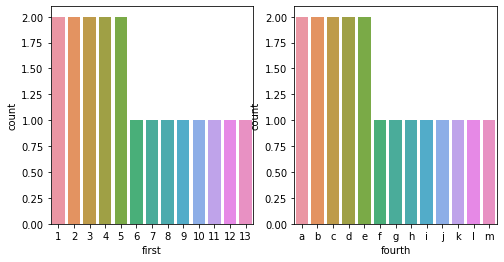

In [34]:
# Multi-Plots side-by-side
fig, (plot1, plot2) = plt.subplots(ncols=2, figsize = (8,4), sharey=False)

#Most ANP belongs to which technology
sns.countplot(df['first'], ax=plot1)

# In which shift most of the ANP are reported?
sns.countplot(df['fourth'], ax=plot2);

___
## Bar Chart Using DF.PLOT

In [56]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,'lifespan': lifespan}, index=index)
df

,speed,lifespan
snail,0.1,2.0
pig,17.5,8.0
elephant,40.0,70.0
rabbit,48.0,1.5
giraffe,52.0,25.0
coyote,69.0,12.0
horse,88.0,28.0


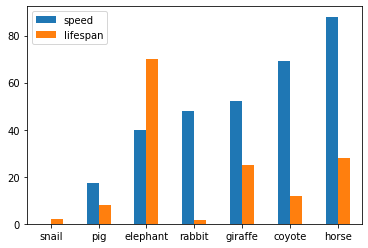

In [57]:
ax = df.plot.bar(rot=0)

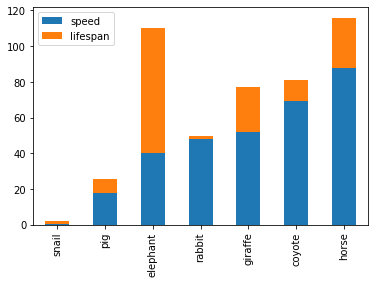

In [51]:
ax = df.plot.bar(stacked=True)

___
## Horizontal Bar Graph

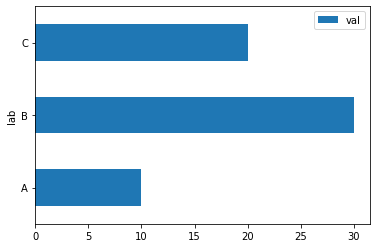

In [47]:
df = pd.DataFrame({'lab': ['A', 'B', 'C'], 'val': [10, 30, 20]})
ax = df.plot.barh(x='lab', y='val')

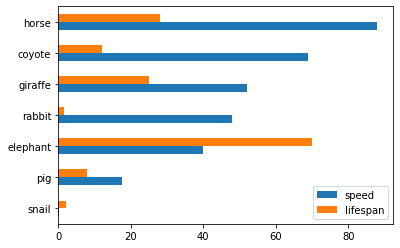

In [55]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant', 'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,'lifespan': lifespan}, index=index)
ax = df.plot.barh()

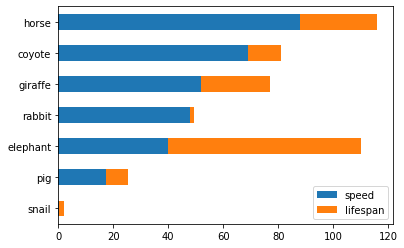

In [49]:
ax = df.plot.barh(stacked=True)

___
## Pie Chart

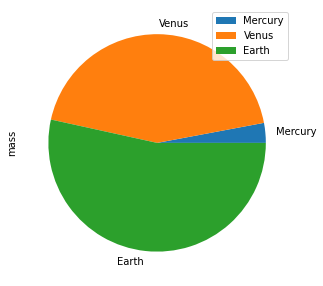

In [17]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],\
                   'radius': [2439.7, 6051.8, 6378.1]},\
                  index=['Mercury', 'Venus', 'Earth'])

plot = df.plot.pie(y='mass', figsize=(5, 5))

___
# BoxPlot

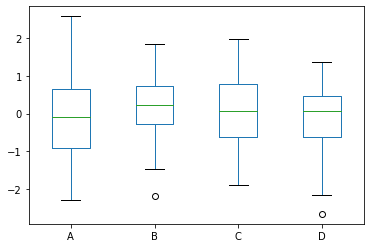

In [46]:
data = np.random.randn(25, 4)
df = pd.DataFrame(data, columns=list('ABCD'))
ax = df.plot.box()

# Scatter Plot

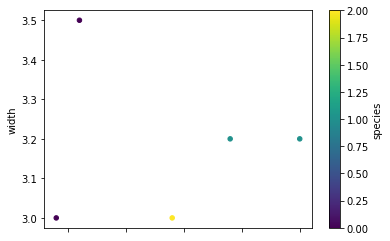

In [39]:
df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],\
                   [6.4, 3.2, 1], [5.9, 3.0, 2]],\
                  columns=['length', 'width', 'species'])

ax2 = df.plot.scatter(x='length',\
                      y='width',\
                      c='species',\
                      colormap='viridis')

#
```python

```

#
```python

```

#
```python

```

#
```python

```

#
```python

```